## Import libraries

In [1]:
import json
import requests
import pandas as pd

## Set variables

In [2]:
BASE_URL = "https://api.figshare.com/v2/"
INST_ID = "231" #CMU is 231

## Retrieve Metadata
1. Retrieve basic metadata
2. Pull out a list of article ids
3. Use those ids to retrieve all metadata fields for each article
4. Convert the resulting JSON to a dataframe
5. Save the dataframe to an excel file

In [3]:
#Gather basic metadata for all items (articles) from the Figshare articles API endpoint
articles = []
for i in range(1,11):
    ids = json.loads(requests.get(BASE_URL + "articles?institution="+INST_ID+"&page_size=1000&page={}".format(i)).content)
    articles.extend(ids)

In [20]:
#See the number of articles
articles[9001]

'code'

In [18]:
for i in range(len(articles)):
    try:
        print(articles[i]['defined_type_name'])
    except:
        print(f"Article {i} w No defined type name")

thesis
dataset
report
online resource
dataset
thesis
thesis
report
thesis
dataset
dataset
thesis
thesis
dataset
thesis
report
thesis
thesis
thesis
thesis
thesis
thesis
thesis
poster
figure
dataset
dataset
thesis
thesis
thesis
online resource
dataset
dataset
thesis
online resource
media
thesis
thesis
thesis
thesis
report
thesis
thesis
thesis
thesis
online resource
thesis
thesis
thesis
thesis
thesis
thesis
thesis
dataset
media
dataset
thesis
thesis
thesis
thesis
thesis
poster
poster
poster
poster
poster
poster
poster
poster
journal contribution
thesis
conference contribution
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
media
thesis
thesis
thesis
thesis
thesis
thesis
thesis
dataset
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
poster
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
thesis
presentation
thesis
thesis
thesis
t

TypeError: the JSON object must be str, bytes or bytearray, not dict

In [7]:
theses = []
for article in articles:
    if article['defined_type'] == 8:
        theses.append(article)

TypeError: string indices must be integers, not 'str'

In [10]:
#Create a list of all the article ids
article_ids = [item['id'] for item in articles]

TypeError: string indices must be integers, not 'str'

In [10]:
import json
import requests
from concurrent.futures import ThreadPoolExecutor

# Assuming BASE_URL and article_ids are defined

def fetch_article_data(art_id):
    """Fetch article data for a given ID."""
    response = requests.get(BASE_URL + "articles/{}".format(art_id))
    article = json.loads(response.content)
    return article

# Use ThreadPoolExecutor to fetch data in parallel
with ThreadPoolExecutor(max_workers=10) as executor:
    full_articles = list(executor.map(fetch_article_data, article_ids))

In [62]:
full_articles[2]

{'files': [{'id': 47149072,
   'name': 'Code.zip',
   'size': 403095,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/47149072',
   'supplied_md5': '4ab8fda0208afaae5b910d90882e2ecf',
   'computed_md5': '4ab8fda0208afaae5b910d90882e2ecf',
   'mimetype': 'application/zip'},
  {'id': 47149075,
   'name': 'Data.zip',
   'size': 455320435,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/47149075',
   'supplied_md5': 'c04582262267b7fe800d7fadfee4a177',
   'computed_md5': 'c04582262267b7fe800d7fadfee4a177',
   'mimetype': 'application/zip'}],
 'custom_fields': [{'name': 'Publisher Statement', 'value': ''},
  {'name': 'Date', 'value': ''}],
 'authors': [{'id': 5977103,
   'full_name': 'Pierre Gianferrara',
   'is_active': True,
   'url_name': 'Pierre_Gianferrara',
   'orcid_id': ''}],
 'figshare_url': 'https://kilthub.cmu.edu/articles/dataset/Electrophysiological_Characterization_of_Motor_Skill_Acquisition_Feedback_Proc

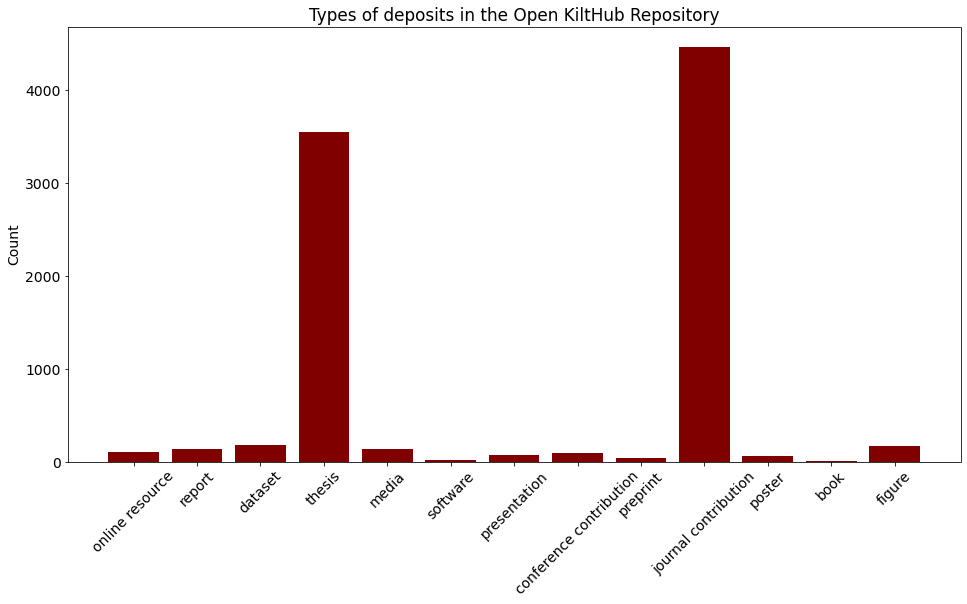

In [34]:
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams.update({'font.size': 14})  # Adjusts the default font size

# Extract 'defined_type' values
defined_types = [article['defined_type_name'] for article in full_articles if 'defined_type_name' in article]

# Count occurrences
type_counts = Counter(defined_types)

# Prepare data for plotting
types = list(type_counts.keys())
counts = list(type_counts.values())

# Create bar plot
plt.figure(figsize=(16, 8))
plt.bar(types, counts, color='maroon')
plt.ylabel('Count')
plt.title('Types of deposits in the Open KiltHub Repository')
plt.xticks(rotation=45)
plt.show()

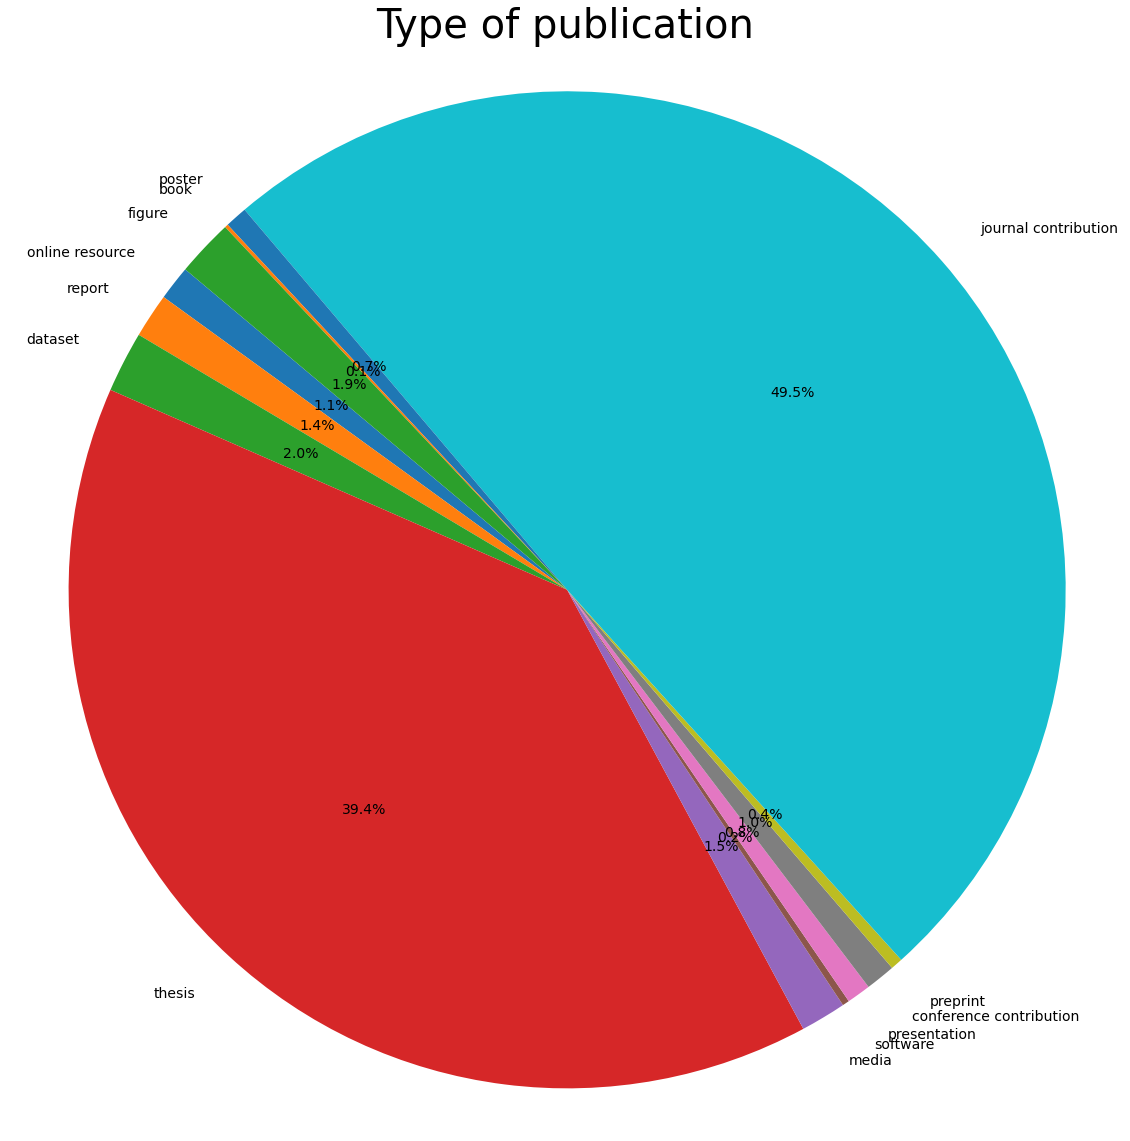

In [45]:
# Create pie chart
plt.figure(figsize=(20, 20))
plt.pie(counts, labels=types, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Type of publication', fontsize=40)
plt.show()

In [80]:
# Assuming full_articles is a list of dictionaries and each article's categories are stored in a list under ['categories']['title']
category_titles = []
for article in full_articles:
    if 'categories' in article:
        try:
            category_titles.append(article['categories'][0]['title'])
        except:
            category_titles.append('No category')
# Count occurrences


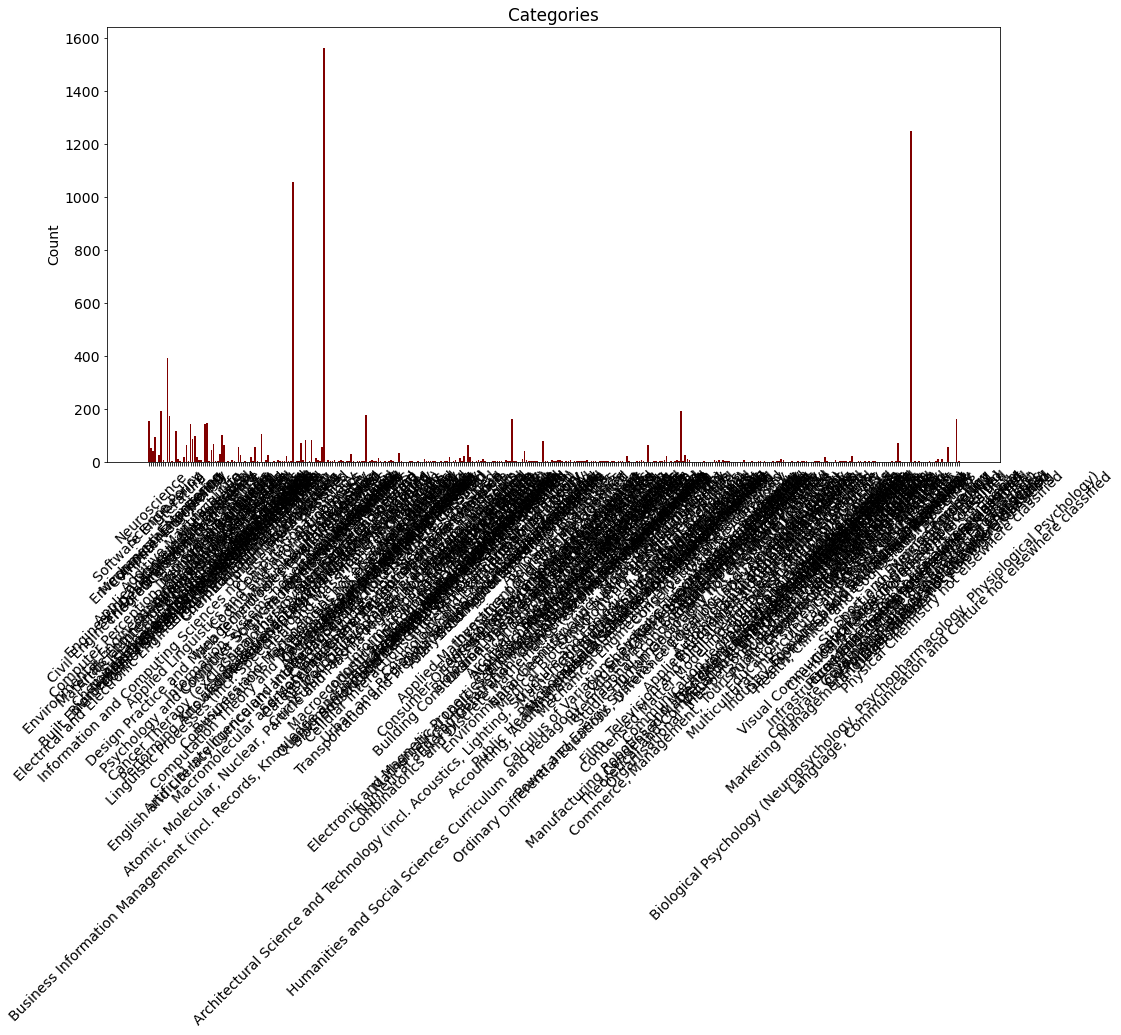

In [81]:
category_counts = Counter(category_titles)

# Prepare data for plotting
types = category_counts.keys()
counts = category_counts.values()

# Create bar plot
plt.figure(figsize=(16, 8))
plt.bar(types, counts, color='maroon')
plt.ylabel('Count')
plt.title('Categories')
plt.xticks(rotation=45)
plt.show()

In [84]:
full_articles[1]['authors'][0]

{'id': 17325202,
 'full_name': 'McKinley Sconiers-Hasan',
 'is_active': True,
 'url_name': 'McKinley_Sconiers-Hasan',
 'orcid_id': ''}

In [104]:
full_articles[100]

{'files': [{'id': 45601689,
   'name': 'A purpose-first theory of transfer.pdf',
   'size': 1280520,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/45601689',
   'supplied_md5': '68253e3a7d9efa983eb5d56b34e67886',
   'computed_md5': '68253e3a7d9efa983eb5d56b34e67886',
   'mimetype': 'application/pdf'}],
 'custom_fields': [{'name': 'Publisher Statement', 'value': ''},
  {'name': 'Date', 'value': '2024-02-19'}],
 'authors': [{'id': 18348294,
   'full_name': 'Mark Guzdial',
   'is_active': False,
   'url_name': '_',
   'orcid_id': '0000-0003-4427-9763'},
  {'id': 18348296,
   'full_name': 'Tamara Nelson-Fromm',
   'is_active': False,
   'url_name': '_',
   'orcid_id': '0000-0001-8197-8366'}],
 'figshare_url': 'https://kilthub.cmu.edu/articles/conference_contribution/A_purpose-first_theory_of_transfer_through_programming_in_a_general_education_computing_course/25587501',
 'download_disabled': False,
 'description': '<p>Hope has dimmed that programming 

In [85]:
has_orcid = []
for article in full_articles:
    if 'authors' in article:
        try:
            if len(article['authors'][0]['orcid_id']) > 0:
                has_orcid.append(True)
            else:
                has_orcid.append(False)
        except:
            print('No ORCID')

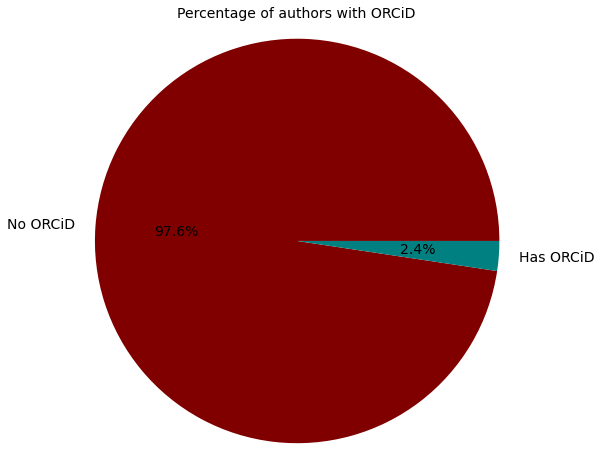

In [158]:
orcid_counts = Counter(has_orcid)

# Prepare data for plotting
labels = ['No ORCiD' if not key else 'Has ORCiD' for key in orcid_counts.keys()]
sizes = orcid_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of authors with ORCiD', fontsize=14)
plt.show()

In [55]:
category_counts = Counter(category_titles)

# Prepare data for plotting
labels = category_counts.keys()
sizes = category_counts.values()

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Each Category Title in Full Articles', fontsize=14)
plt.show()category_titles

[]

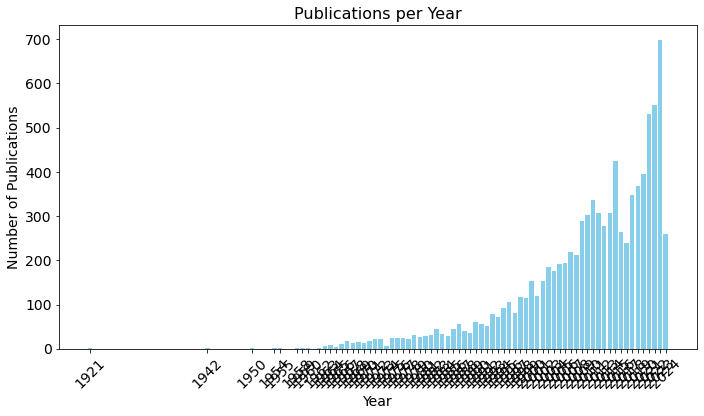

In [102]:
from datetime import datetime
import matplotlib.pyplot as plt

# Assuming full_articles is a list of dictionaries and each has a 'published_date'
publication_years = [datetime.strptime(article['published_date'].split('T')[0], "%Y-%m-%d").year for article in full_articles if 'published_date' in article]

# Count publications per year
year_counts = Counter(publication_years)

# Prepare data for plotting
years = sorted(year_counts.keys())
publications = [year_counts[year] for year in years]

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(years, publications, color='skyblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.title('Publications per Year', fontsize=16)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [105]:
full_articles[1]

{'files': [{'id': 47218084,
   'name': 'api-vulnerabilities-and-risks-2024sr004-1.pdf',
   'size': 777674,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/47218084',
   'supplied_md5': 'aefad6f5befc21c8291a32c33bad2378',
   'computed_md5': 'aefad6f5befc21c8291a32c33bad2378',
   'mimetype': 'application/pdf'}],
 'custom_fields': [{'name': 'Publisher Statement',
   'value': 'This material is based upon work funded and supported by the Department of Defense under Contract No. FA8702-15-D-0002 with Carnegie Mellon University for the operation of the Software Engineering Institute, a federally funded research and development center. The view, opinions, and/or findings contained in this material are those of the author(s) and should not be construed as an official Government position, policy, or decision, unless designated by other documentation. References herein to any specific commercial product, process, or service by trade name, trademark, manufactur

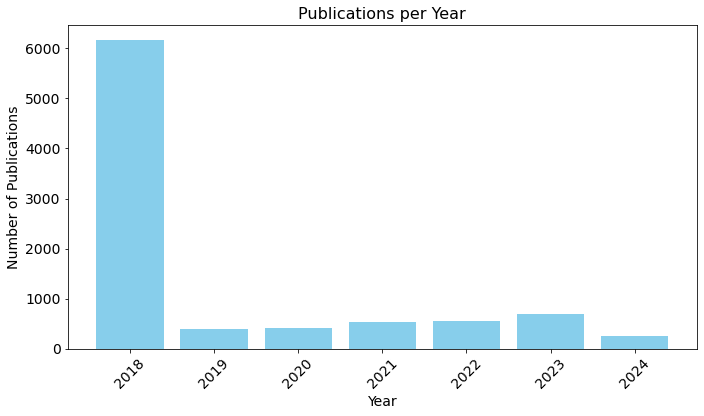

In [106]:
from datetime import datetime
import matplotlib.pyplot as plt

# Assuming full_articles is a list of dictionaries and each has a 'published_date'
created_years = [datetime.strptime(article['created_date'].split('T')[0], "%Y-%m-%d").year for article in full_articles if 'created_date' in article]

# Count publications per year
year_counts = Counter(created_years)

# Prepare data for plotting
years = sorted(year_counts.keys())
publications = [year_counts[year] for year in years]

# Create plot
plt.figure(figsize=(10, 6))
plt.bar(years, publications, color='skyblue')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Publications', fontsize=14)
plt.title('Publications per Year', fontsize=16)
plt.xticks(years, rotation=45)  # Rotate years for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [91]:
datasets = []

for article in full_articles:
    if article['defined_type_name'] == 'dataset':
       datasets.append(article)

In [135]:
len(datasets)

178

In [122]:
def has_readme(article):
    readm = False
    for file in article['files']:
        if 'readme' in file['name'].lower():
            return True
    if not readm:
        return False


In [150]:
have_readme = []
for nd in range(0,len(datasets)):
    try:
        have_readme.append(has_readme(datasets[nd]))
    except:
        have_readme.append(False)
        print(f'Dataset No.{nd} has no files?')

Dataset No.5 has no files?
Dataset No.77 has no files?
Dataset No.85 has no files?


Text(0.5, 1.0, 'Percentage of datasets with README')

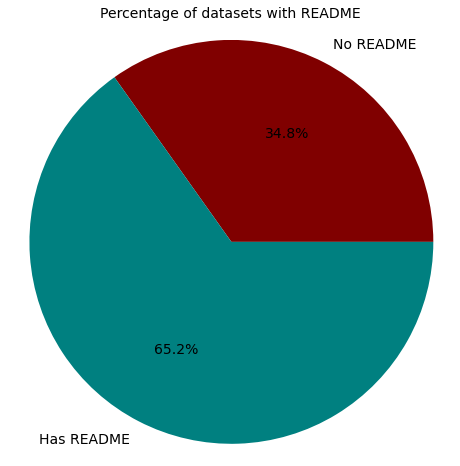

In [157]:
readme_counts = Counter(have_readme)

# Prepare data for plotting
labels = ['No README' if not key else 'Has README' for key in readme_counts.keys()]
sizes = readme_counts.values()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,colors=['#800000', '#008080'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of datasets with README', fontsize=14)

In [152]:
false_indices = [index for index, value in enumerate(have_readme) if not value]
print(false_indices)

[0, 5, 7, 14, 16, 20, 22, 23, 24, 25, 26, 38, 41, 50, 54, 55, 63, 65, 77, 80, 84, 85, 95, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 158, 169, 170, 172, 173, 174]


In [148]:
has_readme(datasets[107])

True

In [147]:
false_indices[20]

107

In [149]:
have_readme[107]

False

In [153]:
datasets[false_indices[20]]

{'files': [{'id': 28404132,
   'name': 'BOLD5000_GLMsingle_ROI_betas.zip',
   'size': 239125643,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/28404132',
   'supplied_md5': '2bf990cf681682b0ab8ed2aeb07c1777',
   'computed_md5': '2bf990cf681682b0ab8ed2aeb07c1777',
   'mimetype': 'application/zip'},
  {'id': 27661926,
   'name': 'CSI1_GLMbetas-TYPEA-ASSUMEHRF_ses-01.nii.gz',
   'size': 272640486,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/27661926',
   'supplied_md5': '5e26066d689f622fb84fc560379ad94c',
   'computed_md5': '5e26066d689f622fb84fc560379ad94c',
   'mimetype': 'application/gzip'},
  {'id': 27661935,
   'name': 'CSI1_GLMbetas-TYPEA-ASSUMEHRF_ses-02.nii.gz',
   'size': 272121230,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/27661935',
   'supplied_md5': 'd252fbc15a67e203ce4e82ad92718054',
   'computed_md5': 'd252fbc15a67e203ce4e82ad92718054',
   'mimetype': '

In [19]:
#For each id in the article id list, retrieve all the metadata for the article by visiting the Figshare article API endpoint
#This may take a while- for example, 6,000 records takes about 1.5 hours
full_articles = []
for art_id in article_ids:
    article = json.loads(requests.get(BASE_URL + "articles/{}".format(art_id)).content)
    full_articles.append(article)

In [20]:
#See the number of articles
len(full_articles)

9000

In [24]:
#View the metadata for the first article in JSON format
with open('public_articles_data.json', 'w') as f:
    json.dump(full_articles, f)

In [22]:
#Create a dataframe from the JSON formatted data
df = pd.DataFrame(full_articles)

In [23]:
df

,files,custom_fields,authors,figshare_url,download_disabled,description,funding,funding_list,version,status,...,defined_type,defined_type_name,group_id,url_private_api,url_public_api,url_private_html,url_public_html,timeline,resource_title,resource_doi
0,"[{'id': 47218165, 'name': 'SEI.blog.graphic_20...","[{'name': 'Publisher Statement', 'value': 'Thi...","[{'id': 14566214, 'full_name': 'Justin Smith',...",https://kilthub.cmu.edu/articles/online_resour...,False,<p>When you’re developing software that will s...,None,[],1,public,...,11,online resource,9987,https://api.figshare.com/v2/account/articles/2...,https://api.figshare.com/v2/articles/26093503,https://figshare.com/account/articles/26093503,https://kilthub.cmu.edu/articles/online_resour...,"{'posted': '2024-06-24T20:01:32', 'firstOnline...",SEI blog,10.58012/0x5f-ea19
1,"[{'id': 47218084, 'name': 'api-vulnerabilities...","[{'name': 'Publisher Statement', 'value': 'Thi...","[{'id': 17325202, 'full_name': 'McKinley Sconi...",https://kilthub.cmu.edu/articles/report/API_Vu...,False,<p>Application programming interfaces (APIs) a...,None,[],1,public,...,18,report,9987,https://api.figshare.com/v2/account/articles/2...,https://api.figshare.com/v2/articles/25282342,https://figshare.com/account/articles/25282342,https://kilthub.cmu.edu/articles/report/API_Vu...,"{'posted': '2024-06-24T19:25:07', 'firstOnline...",None,None
2,"[{'id': 47149072, 'name': 'Code.zip', 'size': ...","[{'name': 'Publisher Statement', 'value': ''},...","[{'id': 5977103, 'full_name': 'Pierre Gianferr...",https://kilthub.cmu.edu/articles/dataset/Elect...,False,<p>Dataset and software used for a project ent...,ONR N00014-21-1-2586,"[{'id': 22852527, 'title': 'ONR N00014-21-1-25...",2,public,...,3,dataset,9933,https://api.figshare.com/v2/account/articles/2...,https://api.figshare.com/v2/articles/25971379,https://figshare.com/account/articles/25971379,https://kilthub.cmu.edu/articles/dataset/Elect...,"{'posted': '2024-06-20T14:56:23', 'firstOnline...",None,None
3,"[{'id': 46850365, 'name': 'README2.txt', 'size...","[{'name': 'Publisher Statement', 'value': ''},...","[{'id': 5970866, 'full_name': 'Marissa Webber'...",https://kilthub.cmu.edu/articles/dataset/Datab...,False,<p>This database categorizes 91 projects using...,DOT Dwight D. Eisenhower Transportation Resear...,"[{'id': 23925542, 'title': 'DOT Dwight D. Eise...",3,public,...,3,dataset,9882,https://api.figshare.com/v2/account/articles/2...,https://api.figshare.com/v2/articles/23393702,https://figshare.com/account/articles/23393702,https://kilthub.cmu.edu/articles/dataset/Datab...,"{'posted': '2024-06-13T16:01:07', 'firstOnline...",,
4,"[{'id': 46997332, 'name': 'Reachability-of-Sys...","[{'name': 'Publisher Statement', 'value': 'Thi...","[{'id': 3889675, 'full_name': 'Lutz Wrage', 'i...",https://kilthub.cmu.edu/articles/report/Reacha...,False,<p>Components in an AADL (Architecture Analysi...,None,[],1,public,...,18,report,9987,https://api.figshare.com/v2/account/articles/2...,https://api.figshare.com/v2/articles/24764256,https://figshare.com/account/articles/24764256,https://kilthub.cmu.edu/articles/report/Reacha...,"{'posted': '2024-06-11T20:03:54', 'firstOnline...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,"[{'id': 12106637, 'name': 'BF03194060', 'size'...","[{'name': 'Publisher Statement', 'value': ''},...","[{'id': 5422262, 'full_name': 'Steven Ritter'...",https://kilthub.cmu.edu/articles/journal_contr...,False,"<p>For 25 years, we have been working to build...",None,[],1,public,...,6,journal contribution,9933,https://api.figshare.com/v2/account/articles/6...,https://api.figshare.com/v2/articles/6613979,https://figshare.com/account/articles/6613979,https://kilthub.cmu.edu/articles/journal_contr...,"{'posted': '2007-04-01T00:00:00', 'firstOnline...",None,None
8996,"[{'id': 12106634, 'name': 's10956-005-4423-5',...","[{'name': 'Publisher Statement', 'value': ''},...","[{'id': 5422406, 'full_nam

In [159]:
with open('public_articles_data.json', 'w') as f:
    full_articles = json.dump(full_articles, f)

In [160]:
reload_articles = json.load(open('public_articles_data.json'))

In [162]:
reload_articles[0]

{'files': [{'id': 47218165,
   'name': 'SEI.blog.graphic_2023.jpg',
   'size': 119145,
   'is_link_only': False,
   'download_url': 'https://ndownloader.figshare.com/files/47218165',
   'supplied_md5': 'a75c285c4f29d57c62cec2549ed0ccda',
   'computed_md5': 'a75c285c4f29d57c62cec2549ed0ccda',
   'mimetype': 'image/jpeg'}],
 'custom_fields': [{'name': 'Publisher Statement',
   'value': 'This material is based upon work funded and supported by the Department of Defense under Contract No. FA8702-15-D-0002 with Carnegie Mellon University for the operation of the Software Engineering Institute, a federally funded research and development center. The view, opinions, and/or findings contained in this material are those of the author(s) and should not be construed as an official Government position, policy, or decision, unless designated by other documentation. References herein to any specific commercial product, process, or service by trade name, trademark, manufacturer, or otherwise, does no